# Kick Detection

### Imports

In [82]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", "use_inf_as_na")
import csv

## Data Pre-Processing

### Creates a dataframe for each instance 

In [201]:
DEBUG = False
subcolumns = ['ax', 'ay', 'az', 'am', 'rx', 'ry', 'rz']

with open("kick_data.csv", 'r') as csvfile:
    lines = csvfile.readlines()
    
kick_data = []
current_movement = None
current_kick_rows = []
kick_dfs = {}
last_movement = None
count = 0
for line in lines:
    line.strip()
    
    if line.startswith("*"):
        current_movement = line.split(",")[1].strip()
        current_movement = current_movement.replace(" ", "_")
        if DEBUG: print(f"New movement: {current_movement}")
        if count != 0:
            if DEBUG: print(f"Creating dataframe for {last_movement} - {last_movement}{str(count)}\n")
            if DEBUG: print(f"count: {count}\n")
            df = pd.DataFrame(current_kick_rows, columns=subcolumns)
            df_name = f"{last_movement}{str(count)}"
            kick_dfs[df_name] = df
        
        if current_movement == last_movement:
            if DEBUG: print(f"Current movement {current_movement} is the same as last movement {last_movement}")
            count+=1

        elif current_movement != last_movement:
            if DEBUG: print(f"Current movement {current_movement}, last movement {last_movement}")
            last_movement = current_movement
            if DEBUG: print(f"Current movement {current_movement}, last movement {last_movement}")
            count = 1
        
        current_kick_rows = []
        
        continue
        
    
    if line.split(",")[0] != "ax":
        current_kick_rows.append(list(map(float, line.split(','))))

if DEBUG: print(f"Creating dataframe for {last_movement} - {last_movement}{str(count)}\n")
if DEBUG: print(f"count: {count}\n")
df = pd.DataFrame(current_kick_rows, columns=subcolumns)
df_name = f"{last_movement}{str(count)}"
kick_dfs[df_name] = df


# Display the dictionary of dataframes
for df_name, df in kick_dfs.items():
    print(f"DataFrame name: {df_name}")
    print(df)
    print("\n")
        

DataFrame name: Front_kick1
           ax        ay        az        am         rx          ry         rz
0    0.000000  0.000000  0.000000  0.000000  16.082764   70.922852 -15.625000
1    0.000000  0.000000  0.000000  0.000000  20.935059   96.313477 -36.834717
2    0.577515 -0.867371  0.211487  1.063288  31.677246   97.869873 -60.333252
3    0.481018 -0.838074  0.237122  1.004683  20.172119  110.443115 -51.025391
4    0.450989 -0.849243  0.201599  0.959942   7.080078  130.981445 -54.626465
..        ...       ...       ...       ...        ...         ...        ...
175  0.348633 -0.941162 -0.202148  1.003361  -0.152588    4.760742   2.166748
176  0.251038 -0.895386 -0.276123  1.009561   0.610352   -3.387451   2.441406
177  0.324463 -0.919189 -0.232910  1.002214  -1.190186   -8.453369   3.265381
178  0.382874 -0.906738 -0.144470  0.994806  -2.502441    0.915527   3.723145
179  0.354309 -0.934387 -0.114990  1.005901  -5.828857    7.476807   6.256104

[180 rows x 7 columns]


DataFrame 

In [73]:
df = kick_dfs["Front_kick1"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ax      180 non-null    float64
 1   ay      180 non-null    float64
 2   az      180 non-null    float64
 3   am      180 non-null    float64
 4   rx      180 non-null    float64
 5   ry      180 non-null    float64
 6   rz      180 non-null    float64
dtypes: float64(7)
memory usage: 10.0 KB


## Graphing the data

In [150]:
SHOW_PAIR_PLOTS = False
front_kick_sample = kick_dfs["Front_kick10"]
low_roundhouse_sample = kick_dfs["Low_roundhouse10"]
mid_roundhouse_sample = kick_dfs["Mid_roundhouse10"]
walking_sample = kick_dfs["Walking1"]
stationary_sample = kick_dfs["Stationary4"]
lifting_sample = kick_dfs["Lifting_knee1"]

In [144]:
if SHOW_PAIR_PLOTS:
    g = sns.PairGrid(front_kick_sample)
    g.map_upper(sns.lineplot)
    # Kernel density estimate (KDE) is for visualising the distribution of observations in a dataset, similar to a histogram
    g.map_lower(sns.kdeplot)
    g.map_diag(sns.kdeplot, lw=3, legend=False)

In [145]:
if SHOW_PAIR_PLOTS:
    g = sns.PairGrid(low_roundhouse_sample)
    g.map_upper(sns.lineplot)
    # Kernel density estimate (KDE) is for visualising the distribution of observations in a dataset, similar to a histogram
    g.map_lower(sns.kdeplot)
    g.map_diag(sns.kdeplot, lw=3, legend=False)

In [146]:
if SHOW_PAIR_PLOTS:
    g = sns.PairGrid(mid_roundhouse_sample)
    g.map_upper(sns.lineplot)
    # Kernel density estimate (KDE) is for visualising the distribution of observations in a dataset, similar to a histogram
    g.map_lower(sns.kdeplot)
    g.map_diag(sns.kdeplot, lw=3, legend=False)

In [147]:
if SHOW_PAIR_PLOTS:
    g = sns.PairGrid(walking_sample)
    g.map_upper(sns.lineplot)
    # Kernel density estimate (KDE) is for visualising the distribution of observations in a dataset, similar to a histogram
    g.map_lower(sns.kdeplot)
    g.map_diag(sns.kdeplot, lw=3, legend=False)

In [148]:
if SHOW_PAIR_PLOTS:
    g = sns.PairGrid(stationary_sample)
    g.map_upper(sns.lineplot)
    # Kernel density estimate (KDE) is for visualising the distribution of observations in a dataset, similar to a histogram
    g.map_lower(sns.kdeplot)
    g.map_diag(sns.kdeplot, lw=3, legend=False)

In [149]:
if SHOW_PAIR_PLOTS:
    g = sns.PairGrid(lifting_sample)
    g.map_upper(sns.lineplot)
    # Kernel density estimate (KDE) is for visualising the distribution of observations in a dataset, similar to a histogram
    g.map_lower(sns.kdeplot)
    g.map_diag(sns.kdeplot, lw=3, legend=False)

<Axes: ylabel='rz'>

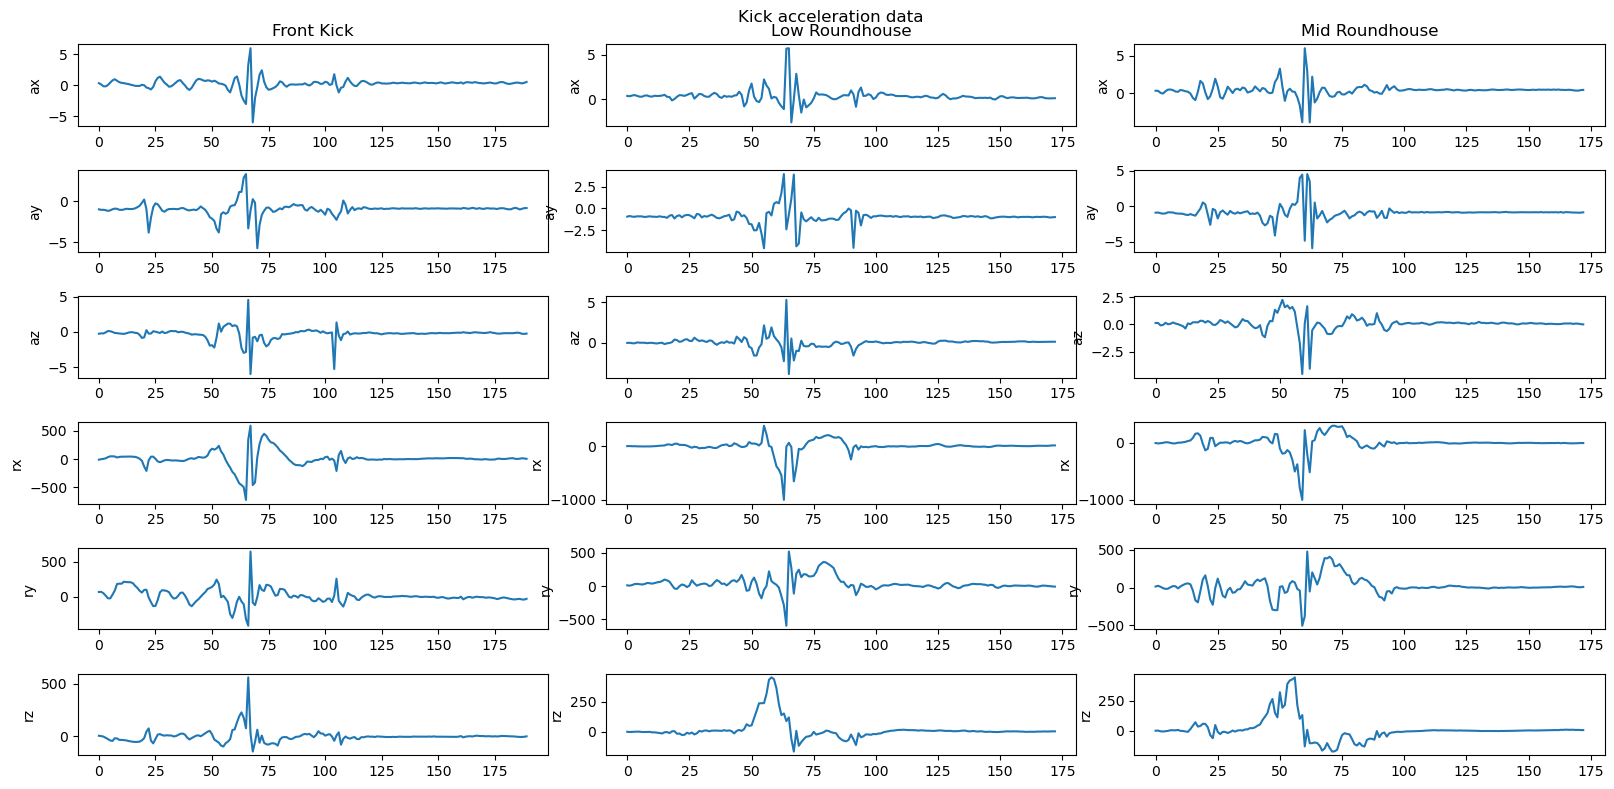

In [151]:
figure, axes = plt.subplots(6,3, figsize=(16,8))
figure.suptitle("Kick acceleration data")
plt.tight_layout()

axes[0,0].set_title("Front Kick")
sns.lineplot(ax = axes[0,0], data=front_kick_sample["ax"])
sns.lineplot(ax = axes[1,0], data=front_kick_sample["ay"])
sns.lineplot(ax=axes[2,0], data=front_kick_sample["az"])
sns.lineplot(ax=axes[3,0], data=front_kick_sample["rx"])
sns.lineplot(ax=axes[4,0], data=front_kick_sample["ry"])
sns.lineplot(ax=axes[5,0], data=front_kick_sample["rz"])

axes[0,1].set_title("Low Roundhouse")
sns.lineplot(ax = axes[0,1], data=low_roundhouse_sample["ax"])
sns.lineplot(ax = axes[1,1], data=low_roundhouse_sample["ay"])
sns.lineplot(ax = axes[2,1], data=low_roundhouse_sample["az"])
sns.lineplot(ax = axes[3,1], data=low_roundhouse_sample["rx"])
sns.lineplot(ax=axes[4,1], data=low_roundhouse_sample["ry"])
sns.lineplot(ax=axes[5,1], data=low_roundhouse_sample["rz"])

axes[0,2].set_title("Mid Roundhouse")
sns.lineplot(ax = axes[0,2], data=mid_roundhouse_sample["ax"])
sns.lineplot(ax = axes[1,2],data=mid_roundhouse_sample["ay"])
sns.lineplot(ax = axes[2,2], data=mid_roundhouse_sample["az"])
sns.lineplot(ax = axes[3,2], data=mid_roundhouse_sample["rx"])
sns.lineplot(ax = axes[4,2], data=mid_roundhouse_sample["ry"])
sns.lineplot(ax = axes[5,2], data=mid_roundhouse_sample["rz"])

## Analysis of graphs

- Possible issue with the stationary data, the first three look very much like the walking data
- 

## Prediction from graph features

# Machine learning classification

## ML Pre-Processing

In [241]:
import re

pattern = r'[0-9]'

list_dfs = []
lengths = []
original_column_names = list(df.columns)
print(original_column_names)
new_column_names = []



for i in range(212*7):
        name = f"{original_column_names[i%7]}_{i}"
        new_column_names.append(name)
new_column_names.append("movement")
final_df = pd.DataFrame(columns=new_column_names)
current_row = []
whole_row = []
temp = []
for df_name, df in kick_dfs.items():
    for row in df.iterrows():
        # put all values from row in a list 
        # append to whole row list
        current_row = row[1].values.flatten().tolist()
        whole_row.extend(current_row)
    if len(whole_row) < 212*7:
        for j in range(212*7-len(whole_row)):
            temp.append(pd.NA)
        whole_row.extend(temp)
    whole_row.append(re.sub(pattern,'',df_name))
    final_df.loc[len(final_df)] = whole_row
    whole_row = []
    temp = []
    
display(final_df)



['ax', 'ay', 'az', 'am', 'rx', 'ry', 'rz']


C:\Users\sidhu\AppData\Local\Temp\ipykernel_25832\2441282803.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df.loc[len(final_df)] = whole_row
C:\Users\sidhu\AppData\Local\Temp\ipykernel_25832\2441282803.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df.loc[len(final_df)] = whole_row
C:\Users\sidhu\AppData\Local\Temp\ipykernel_25832\2441282803.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this

,ax_0,ay_1,az_2,am_3,rx_4,ry_5,rz_6,ax_7,ay_8,az_9,...,ry_1475,rz_1476,ax_1477,ay_1478,az_1479,am_1480,rx_1481,ry_1482,rz_1483,movement
0,0.000000,0.000000,0.000000,0.000000,16.082764,70.922852,-15.625000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Front_kick
1,0.191895,-1.051758,-0.278870,1.105091,11.535645,-2.380371,0.488281,0.303223,-0.994629,-0.241516,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Front_kick
2,0.170471,-0.934204,-0.300659,0.982957,16.021729,3.051758,-3.356934,0.108582,-0.779480,-0.217163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Front_kick
3,0.603149,-0.921021,-0.289490,1.138364,-2.960205,49.041748,4.760742,0.657898,-0.894470,-0.221191,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Front_kick
4,0.135498,-0.963867,-0.090820,0.976598,-2.441406,-2.410889,-3.265381,0.155273,-0.952515,-0.073792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Front_kick
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,0.431030,-0.899231,-0.213501,1.022423,3.570557,-1.617432,1.678467,0.429932,-0.891174,-0.197754,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lifting_knee
153,0.362915,-0.920654,-0.025269,0.990462,-4.943848,3.265381,-4.364014,0.377197,-0.882202,-0.018127,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lifting_knee
154,0.342407,-0.973755,-0.059143,1.032284,0.122070,4.638672,0.762939,0.265137,-0.914062,-0.038269,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lifting_knee
155,0.314575,-0.939697,-0.136047,1.000249,-2.838135,-2.349854,-2.014160,0.324280,-0.949036,-0.137512,...,0.915527,13.275146,0.461975,-0.866638,0.015747,0.977412,5.584717,-0.823975,13.946533,Lifting_knee


In [242]:
final_df = final_df.dropna(axis=1)
display(final_df)

,ax_0,ay_1,az_2,am_3,rx_4,ry_5,rz_6,ax_7,ay_8,az_9,...,ry_1195,rz_1196,ax_1197,ay_1198,az_1199,am_1200,rx_1201,ry_1202,rz_1203,movement
0,0.000000,0.000000,0.000000,0.000000,16.082764,70.922852,-15.625000,0.000000,0.000000,0.000000,...,-40.191650,-3.753662,0.377014,-0.942078,-0.113342,1.021027,14.923096,-36.071777,-2.716064,Front_kick
1,0.191895,-1.051758,-0.278870,1.105091,11.535645,-2.380371,0.488281,0.303223,-0.994629,-0.241516,...,0.183105,-0.762939,0.252319,-0.931274,-0.255066,1.000692,3.845215,-2.838135,-0.518799,Front_kick
2,0.170471,-0.934204,-0.300659,0.982957,16.021729,3.051758,-3.356934,0.108582,-0.779480,-0.217163,...,10.253906,1.098633,0.366760,-0.875061,-0.218811,0.960959,1.556396,3.875732,-0.274658,Front_kick
3,0.603149,-0.921021,-0.289490,1.138364,-2.960205,49.041748,4.760742,0.657898,-0.894470,-0.221191,...,-35.766602,-6.347656,0.544006,-0.927612,-0.143005,1.063379,10.681152,-17.578125,-0.671387,Front_kick
4,0.135498,-0.963867,-0.090820,0.976598,-2.441406,-2.410889,-3.265381,0.155273,-0.952515,-0.073792,...,-22.766113,-8.087158,0.229980,-0.916992,-0.139709,0.927158,16.967773,-30.151367,-7.934570,Front_kick
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,0.431030,-0.899231,-0.213501,1.022423,3.570557,-1.617432,1.678467,0.429932,-0.891174,-0.197754,...,-0.640869,-16.967773,0.316223,-0.936584,0.071960,0.987312,-0.183105,-7.904053,-16.571045,Lifting_knee
153,0.362915,-0.920654,-0.025269,0.990462,-4.943848,3.265381,-4.364014,0.377197,-0.882202,-0.018127,...,1.953125,3.234863,0.369324,-0.932922,-0.033691,1.003914,-0.701904,2.838135,3.295898,Lifting_knee
154,0.342407,-0.973755,-0.059143,1.032284,0.122070,4.638672,0.762939,0.265137,-0.914062,-0.038269,...,1.190186,-1.068115,0.242065,-0.970825,0.000366,1.000549,2.532959,-1.739502,-0.671387,Lifting_knee
155,0.314575,-0.939697,-0.136047,1.000249,-2.838135,-2.349854,-2.014160,0.324280,-0.949036,-0.137512,...,8.453369,-13.031006,0.417480,-0.934570,-0.008972,1.023617,1.464844,5.828857,-8.911133,Lifting_knee


### To use the data for ML I need each kick instance to be one line,
#### Options:
- Create new column headers for each row of data e.g. ax_1 ...

#### Problems:
- Some of the kicks have a different number of lines of recorded data 


## Model training and testing 

In [246]:
# Select all the kicks
df = final_df.loc[(final_df['movement'] == "Front_kick")|(final_df['movement'] == "Low_roundhouse")|(final_df['movement'] == "Mid_roundhouse")]
display(df)
df.describe()


,ax_0,ay_1,az_2,am_3,rx_4,ry_5,rz_6,ax_7,ay_8,az_9,...,ry_1195,rz_1196,ax_1197,ay_1198,az_1199,am_1200,rx_1201,ry_1202,rz_1203,movement
0,0.000000,0.000000,0.000000,0.000000,16.082764,70.922852,-15.625000,0.000000,0.000000,0.000000,...,-40.191650,-3.753662,0.377014,-0.942078,-0.113342,1.021027,14.923096,-36.071777,-2.716064,Front_kick
1,0.191895,-1.051758,-0.278870,1.105091,11.535645,-2.380371,0.488281,0.303223,-0.994629,-0.241516,...,0.183105,-0.762939,0.252319,-0.931274,-0.255066,1.000692,3.845215,-2.838135,-0.518799,Front_kick
2,0.170471,-0.934204,-0.300659,0.982957,16.021729,3.051758,-3.356934,0.108582,-0.779480,-0.217163,...,10.253906,1.098633,0.366760,-0.875061,-0.218811,0.960959,1.556396,3.875732,-0.274658,Front_kick
3,0.603149,-0.921021,-0.289490,1.138364,-2.960205,49.041748,4.760742,0.657898,-0.894470,-0.221191,...,-35.766602,-6.347656,0.544006,-0.927612,-0.143005,1.063379,10.681152,-17.578125,-0.671387,Front_kick
4,0.135498,-0.963867,-0.090820,0.976598,-2.441406,-2.410889,-3.265381,0.155273,-0.952515,-0.073792,...,-22.766113,-8.087158,0.229980,-0.916992,-0.139709,0.927158,16.967773,-30.151367,-7.934570,Front_kick
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,0.211853,-1.003967,0.077271,0.970008,-1.708984,16.296387,0.701904,0.024719,-0.916809,0.139893,...,3.875732,-5.828857,0.174133,-1.002686,-0.092102,1.021853,8.514404,-9.429932,-3.875732,Mid_roundhouse
78,0.308899,-0.977234,0.184204,1.034052,-5.249023,6.927490,-11.474609,0.331604,-0.929626,0.126892,...,13.671875,0.610352,0.061157,-1.010193,0.150146,1.023120,-0.549316,7.507324,0.976562,Mid_roundhouse
79,0.252502,-0.866455,0.136047,0.909833,-5.554199,4.974365,4.608154,0.213501,-1.020996,0.121399,...,1.831055,2.136230,0.130371,-0.904907,0.270081,0.973799,-4.913330,10.192871,-2.502441,Mid_roundhouse
80,0.411438,-0.796875,0.261292,0.951099,-2.563477,-1.403809,-6.225586,0.412720,-0.907654,0.230896,...,18.066406,-2.502441,-0.135315,-1.062378,0.276306,1.084252,-0.152588,-5.493164,-1.586914,Mid_roundhouse


,ax_0,ay_1,az_2,am_3,rx_4,ry_5,rz_6,ax_7,ay_8,az_9,...,rx_1194,ry_1195,rz_1196,ax_1197,ay_1198,az_1199,am_1200,rx_1201,ry_1202,rz_1203
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,...,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,0.295260,-0.915972,0.037617,1.001863,-0.882405,14.597823,-1.793466,0.295074,-0.920471,0.050463,...,3.414247,-4.909608,1.457400,0.249307,-0.921623,0.000456,0.999412,2.774867,-5.687807,1.086724
std,0.130706,0.130685,0.240568,0.124972,9.615120,41.865007,10.904291,0.128098,0.136459,0.230182,...,16.657249,29.643787,9.934024,0.223429,0.123910,0.195847,0.112752,14.278410,28.251132,10.242495
min,-0.061523,-1.129761,-0.461609,0.000000,-27.648926,-32.623291,-66.284180,0.000000,-1.203735,-0.348999,...,-53.436279,-158.142090,-31.158447,-0.966614,-1.357361,-0.460510,0.396826,-25.878906,-177.093506,-36.499023
25%,0.216568,-0.978424,-0.181366,0.983006,-5.622864,-1.953125,-3.997803,0.204117,-0.980988,-0.138107,...,-3.364563,-7.301331,-2.044678,0.152985,-0.989273,-0.159760,0.978840,-3.829956,-7.629395,-1.838684
50%,0.304871,-0.937775,0.077271,1.007146,-1.388550,4.440308,0.320435,0.306519,-0.932922,0.054932,...,1.708984,-0.473022,0.518799,0.263397,-0.929169,0.032776,0.999540,1.419067,-0.549316,-0.076294
75%,0.372253,-0.897537,0.185394,1.028271,3.433228,16.342163,3.501892,0.368454,-0.901566,0.184250,...,6.912231,4.432678,2.159119,0.374680,-0.878906,0.126617,1.024527,7.102966,6.317139,2.517700
max,0.635010,0.000000,0.773621,1.159704,34.393311,240.875244,14.068604,0.657898,0.000000,0.672729,...,88.043213,99.700928,51.757812,0.728210,-0.176880,0.501709,1.682260,96.862793,48.278809,49.499512


Accuracy: 0.7647058823529411
movement
Front_kick        6
Mid_roundhouse    6
Low_roundhouse    5
Name: count, dtype: int64
Accuracy: 0.7213235294117647


[Text(0.5, 0, 'True kick'), Text(0, 0.5, 'Predicted kick')]

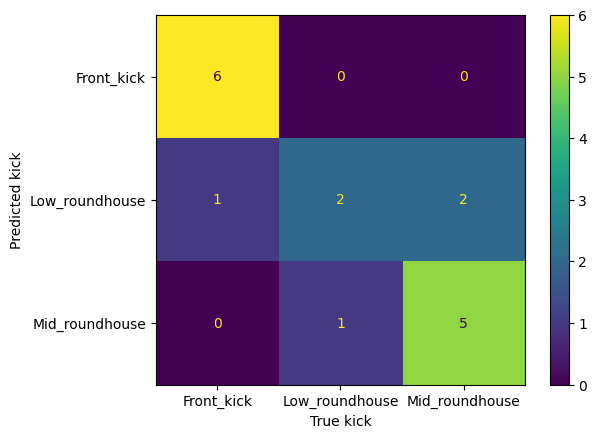

In [275]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedShuffleSplit, KFold, cross_val_score, cross_val_predict
Y=df["movement"]
X = df.drop(["movement"],axis=1)
# display(Y)
# display(X)
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, stratify=Y)

model = svm.SVC()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
print(y_test.value_counts())

cv = KFold(n_splits=5, shuffle=True, random_state=42)
model2 = svm.SVC()
scores = cross_val_score(model2, X, Y, scoring='accuracy', cv=cv)
print("Accuracy:",scores.mean())
cm = confusion_matrix(y_test, y_pred)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['Front_kick', 'Low_roundhouse', 'Mid_roundhouse'])
cmd_obj.plot()
cmd_obj.ax_.set(xlabel='True kick', ylabel='Predicted kick')

In [284]:
def test_model(model):
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv)
    y_pred = cross_val_predict(model, X, Y, cv=cv)
    cm = confusion_matrix(Y, y_pred)
    cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['Front_kick', 'Low_roundhouse', 'Mid_roundhouse'])
    cmd_obj.plot()
    cmd_obj.ax_.set(xlabel='True kick', ylabel='Predicted kick')
    print("Accuracy:",scores.mean())

In [281]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}]
svc = svm.SVC()
clf = GridSearchCV(svc,param_grid)
clf.fit(X,Y)
clf.best_estimator_

SVC(C=1, kernel='linear')

Accuracy: 0.8073529411764706


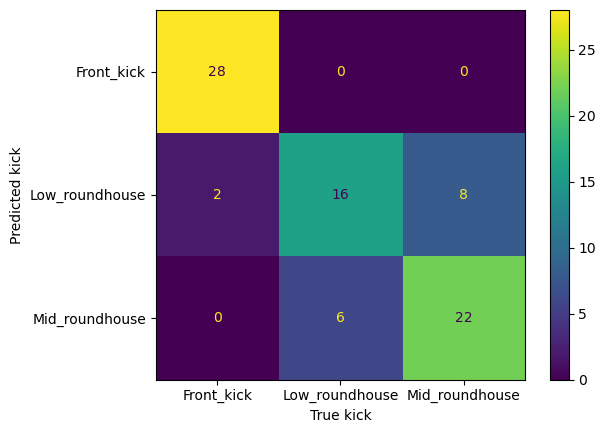

In [285]:
model = svm.SVC(C=1, kernel='linear')
test_model(model)

In [292]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [500, 1000,2000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4,5,6,7,8],
    'criterion': ['gini']
}
rfc = RandomForestClassifier()
CV_rfc = GridSearchCV(estimator=rfc,param_grid=param_grid, cv=5)
CV_rfc.fit(X,Y)
CV_rfc.best_params_

C:\Users\sidhu\anaconda3\envs\kick_detection_project\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
75 fits failed out of a total of 225.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sidhu\anaconda3\envs\kick_detection_project\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sidhu\anaconda3\envs\kick_detection_project\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\sidhu\anaconda3\envs\kick_detection_project\Lib\site-packages\sklearn\base.py", line

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 500}

In [291]:
CV_rfc.cv_results_

{'mean_fit_time': array([0.02080059, 0.01619959, 0.87430997, 1.56719098, 0.5009048 ,
        0.96628089, 0.01081772, 0.01104946, 0.80408754, 1.84031429,
        0.57145419, 1.07610717, 0.01243215, 0.01281743, 1.1160696 ,
        1.90786715, 0.55077133, 1.0420403 , 0.01187053, 0.01171999,
        0.82865143, 1.57233696, 0.5098866 , 1.02709637, 0.01141124,
        0.011063  , 0.94551883, 2.03479557, 0.53514566, 1.10326848,
        0.01139746, 0.0110075 , 0.93217702, 1.80637336, 0.66882467,
        1.21632538, 0.23936949, 0.01087198, 0.93973651, 1.87934217,
        0.54126554, 1.18319283, 0.01178527, 0.01140265, 0.97581382,
        1.83860297, 0.55842071, 1.16516719, 0.01240268, 0.01359844,
        0.94484577, 1.83877697, 0.61140079, 1.2453599 , 0.01223564,
        0.01161146, 1.03296838, 1.98652921, 0.78368506, 1.34193244]),
 'std_fit_time': array([5.23063518e-03, 3.25059519e-03, 6.64557186e-02, 2.32576056e-02,
        4.47356995e-03, 3.55955743e-03, 7.52491436e-04, 8.52225234e-04,
     

Accuracy: 0.8433823529411765


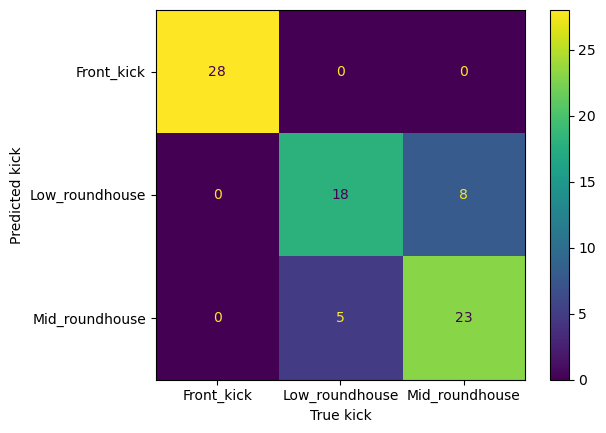

In [290]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='entropy', max_depth=7, max_features='log2', n_estimators=1000)
test_model(rfc)

In [297]:
from sklearn.neural_network import MLPClassifier
parameters = {'solver': ['lbfgs'], 'max_iter': [1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000 ], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[0,1,2,3,4,5,6,7,8,9]}
clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)
clf.fit(x_train,y_train)
print(clf.score(x_train, y_train))
print(clf.best_params_)

1.0
{'alpha': 0.1, 'hidden_layer_sizes': 13, 'max_iter': 1000, 'random_state': 8, 'solver': 'lbfgs'}


Accuracy: 0.6948529411764706


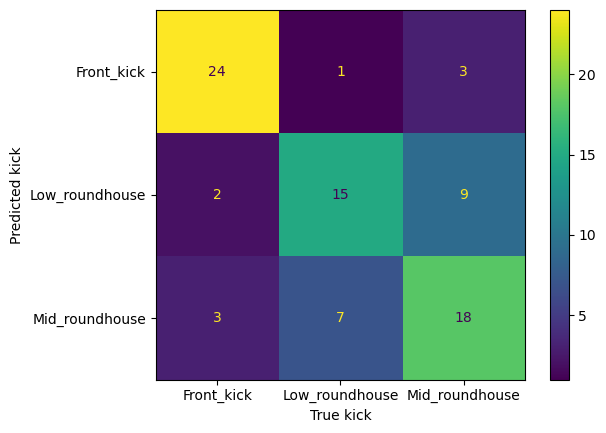

In [298]:
from sklearn.neural_network import MLPClassifier
# clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(5,2),alpha=1e-5, random_state=42)
clf = MLPClassifier(solver='lbfgs', alpha=0.1, max_iter=1000, hidden_layer_sizes=13, random_state=8)
test_model(clf)

Accuracy: 0.6845588235294118


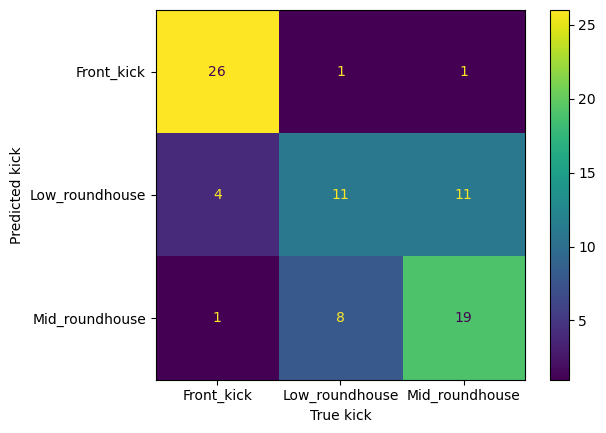

In [299]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
test_model(clf)

Accuracy: 0.7323529411764705


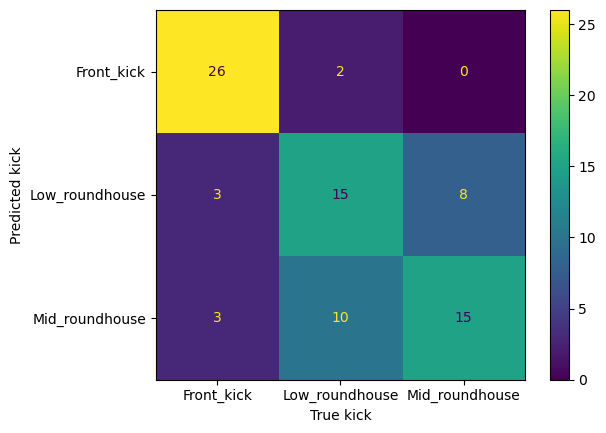

In [300]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(svm.SVC(C=1, kernel='linear'), max_samples=0.5, max_features=0.5)
test_model(bagging)

Accuracy: 0.8073529411764706


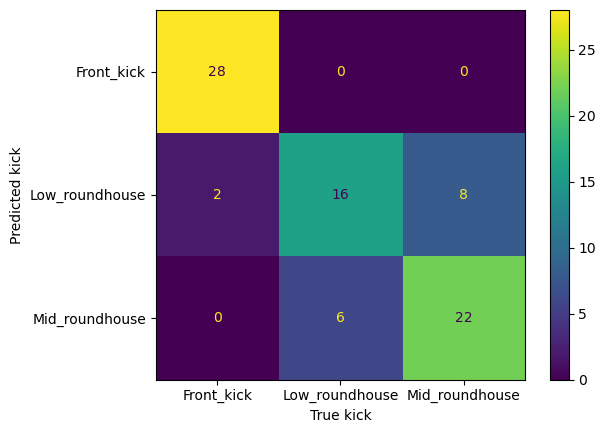

In [312]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

clf1 = LogisticRegression(C=0.001, penalty='l2', max_iter=200)
clf2 = svm.SVC(C=1, kernel='linear')
clf3 = RandomForestClassifier(criterion='entropy', max_depth=7, max_features='log2', n_estimators=1000)
eclf = VotingClassifier(estimators=[('clf1',clf1), ('clf2',clf2), ('clf3',clf3)], voting='hard')
test_model(eclf)

In [1]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=0.001, penalty='l2', max_iter=200)
# grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
# clf_CV = GridSearchCV(clf,grid, cv=5)
# clf_CV.fit(x_train,y_train)
# print(clf_CV.best_params_)
# print(clf_CV.best_score_)
test_model(clf)

NameError: name 'test_model' is not defined

In [ ]:
import tensorflow as tf